In [262]:
# Importing necessary libraries to look at the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## EDA
---

1. We do not need new fields, these fields are sufficient. But we might add more to compare different major cities.

In [263]:
# Getting the display settings so that we can see all of the data
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)  

In [264]:
# loading the csv into a dataframe using pandas
crime_df = pd.read_csv('../data/crimedata2.csv',encoding='latin-1')

In [265]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


In [266]:
# Looking at the number of rows and columns in the dataframe
crime_df.shape

(2215, 147)

In [267]:
crime_df.dtypes

Êcommunityname            object
state                     object
countyCode                object
communityCode             object
fold                       int64
population                 int64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                  int64
pctUrban                 float64
medIncome                  int64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                  int64
perCapInc                  int64
whitePerCap                int64
blackPerCap                int64
indianPerCap               int64
AsianPerCap                int64
OtherPerCa

- There's a lot of columns that are object that are supposed to be of a numeric type.

## Type Correction
---

In [268]:
crime_df[crime_df.columns[4:]] = crime_df[crime_df.columns[4:]].apply(pd.to_numeric, errors='coerce')
crime_df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,3

In [269]:
crime_df.dtypes

Êcommunityname            object
state                     object
countyCode                object
communityCode             object
fold                       int64
population                 int64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                  int64
pctUrban                 float64
medIncome                  int64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                  int64
perCapInc                  int64
whitePerCap                int64
blackPerCap                int64
indianPerCap               int64
AsianPerCap                int64
OtherPerCa

## Features list
---

In [270]:
population_features  = ["population"]
crime_features       = [ "autoTheft", "autoTheftPerPop", "larcenies", "larcPerPop", "burglaries", "burglPerPop", "robberies", "robbbPerPop"]
money_features       = ["medIncome", "RentMedian", "MedRent"]
race_features        = ["racepctblack", "racePctWhite", "racePctAsian", "racePctHisp"]
age_features         = ["agePct12t21", "agePct12t29", "agePct16t24", "agePct65up"]
categorical_features = ['Êcommunityname', 'state', 'countyCode', 'communityCode']
drop_list = [
    'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
    'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
    'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
    'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 
    'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 
    'LemasGangUnitDeploy', 'PolicBudgPerPop'
]


In [271]:
crime_df = crime_df.drop(drop_list, axis=1)
crime_df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,0,0.0,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,0,0.0,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,3,8.3,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.8

## Missing Values
---

#### Question Mark Missing Values

In [272]:
# Count the occurrences of '?' in the DataFrame
question_mark_count = crime_df.apply(lambda row: row.astype(str).str.count('\?')).sum().sum()
question_mark_count

np.int64(2445)

In [273]:
len(crime_df[crime_df.isna()==True])

2215

2. There is about 2215 missing values, and there are 44592 values where there are "?" values that are not interpretted as missing values.

## Bivariate Analysis
---

In [274]:
def plot_barplot(dataframe:pd.DataFrame, x:str, y:str=None, title:str=None, by:str=None, errorbar: tuple|bool=None, xtick_rotation:int=0, figsize:tuple=(12, 7)):
    plt.figure(figsize=figsize)
    sns.barplot(
        data=dataframe,
        x=x,
        y=y,
        hue=by,
        errorbar=errorbar
    )
    plt.title(title)
    plt.xlabel(x)
    if y != None:
        plt.ylabel(y)
    plt.xticks(rotation=xtick_rotation)
    plt.show()

### Auto theft vs State

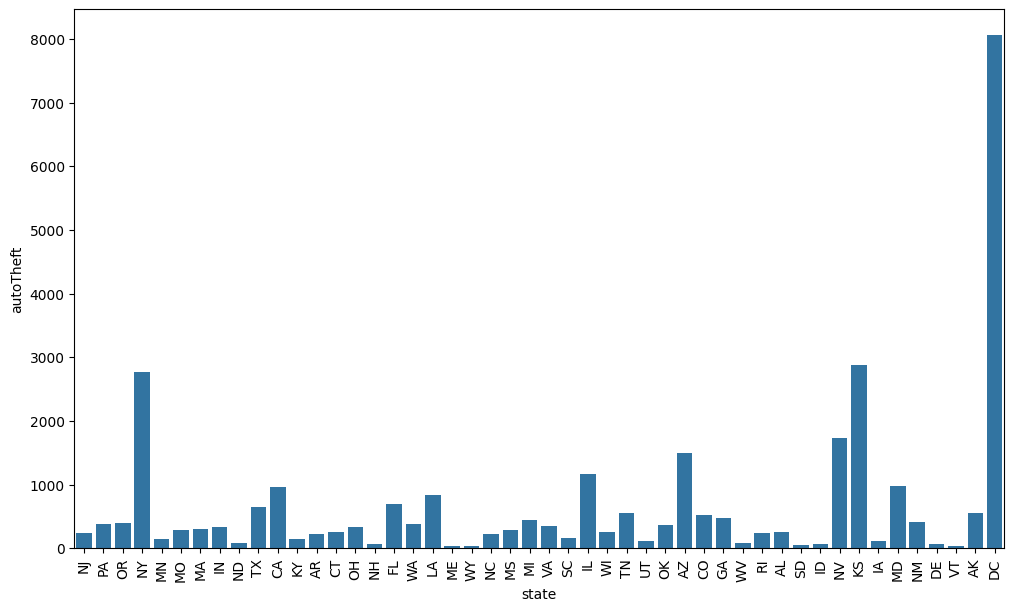

In [275]:
plot_barplot(dataframe=crime_df, x="state", y="autoTheft", xtick_rotation=90)

- DC has highest autotheft in the country. NY and Kansas are second in auto theft. 

### Larcenies vs State

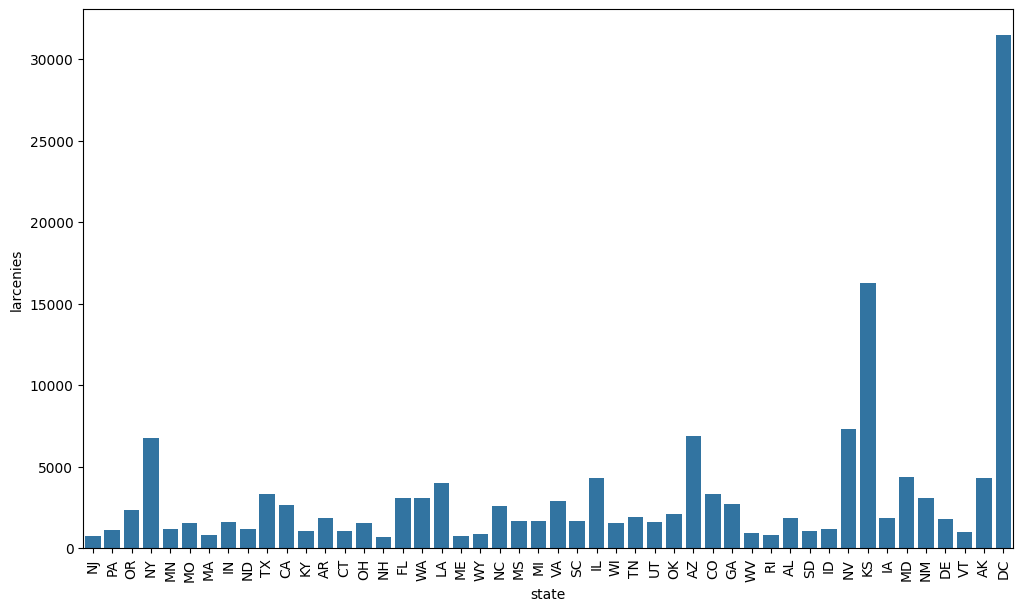

In [276]:
plot_barplot(dataframe=crime_df, x="state", y="larcenies", xtick_rotation=90)

- DC is also highest by far in larcenies

### Burglaries vs State

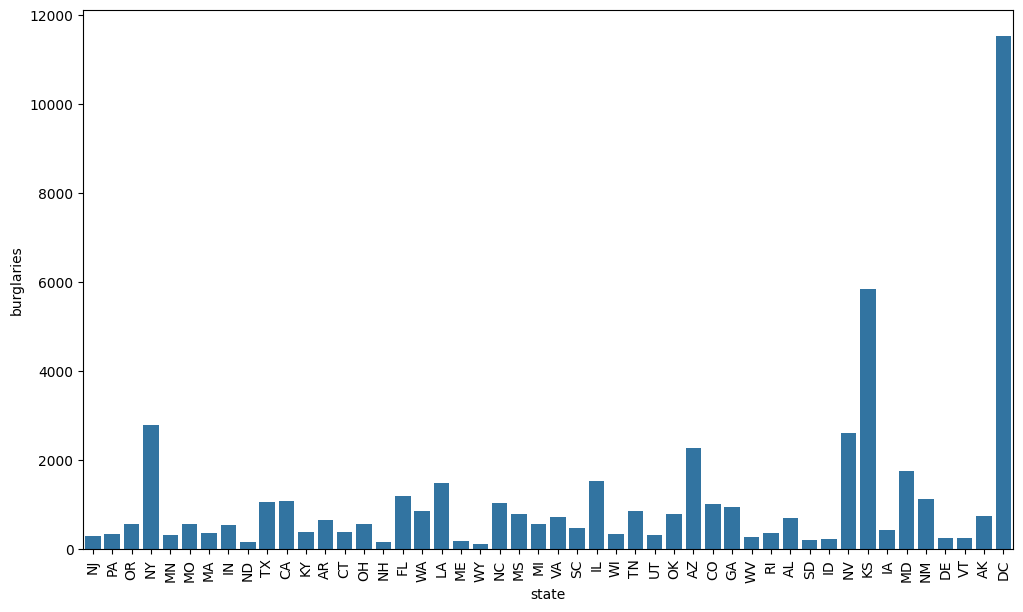

In [277]:
plot_barplot(dataframe=crime_df, x="state", y="burglaries", xtick_rotation=90)

- DC is also the highest in burglaries

## Population of each State

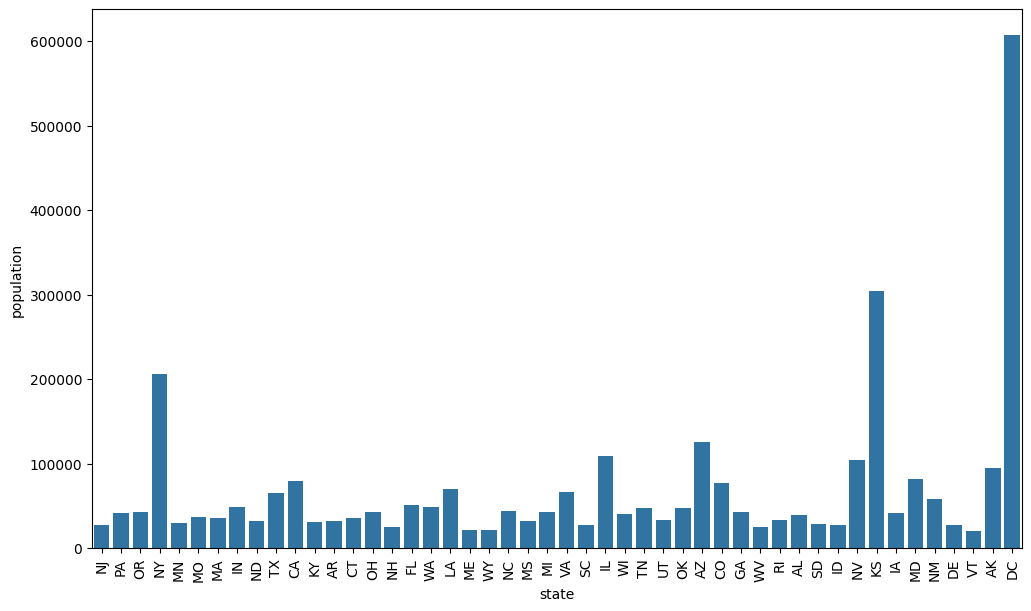

In [278]:
plot_barplot(dataframe=crime_df, x="state", y="population", xtick_rotation=90)

- And DC is probably the highest in the last 3 crimes because they have the highest population by far
- So, we can say that the more population, the more crime that will take place.

In [279]:
def multiple_barplots(dataframe:pd.DataFrame, x:str|list, y:str|list[str],  title:str=None, n_rows:int=1, n_cols:int=1, figsize:tuple=(9, 4), xtick_rotation:int=0, sharex:bool=True, sharey:bool=True, errorbar:tuple|bool=None)->None:
    fig, ax = plt.subplots(n_rows, n_cols, sharex=sharex, sharey=sharey, figsize=figsize)
    col_index = 0

    if n_rows>1 and n_cols>1:
        for i in range(n_rows):
            for j in range(n_cols):
                ax[i][j] = sns.barplot(data=dataframe, x=x, y=y[col_index], ax=ax[i][j], errorbar=errorbar)
                ax[i][j].tick_params(rotation=xtick_rotation)
                ax[i][j].set_title(f"{y[col_index]} vs {x}")
                ax[i][j].set(ylabel=None, xlabel=None)
                col_index += 1
    elif n_cols > 1:
        for j in range(n_cols):
            ax[j] = sns.barplot(data=dataframe, x=x, y=y[col_index], ax=ax[j], errorbar=errorbar)
            ax[j].tick_params(rotation=xtick_rotation)
            ax[j].set_title(f"{y[col_index]} vs {x}")
            ax[j].set(ylabel=None, xlabel=None)
            col_index += 1
    fig.suptitle(title)
    plt.tight_layout()
    fig.show()

C:\Users\riain\AppData\Local\Temp\ipykernel_18600\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


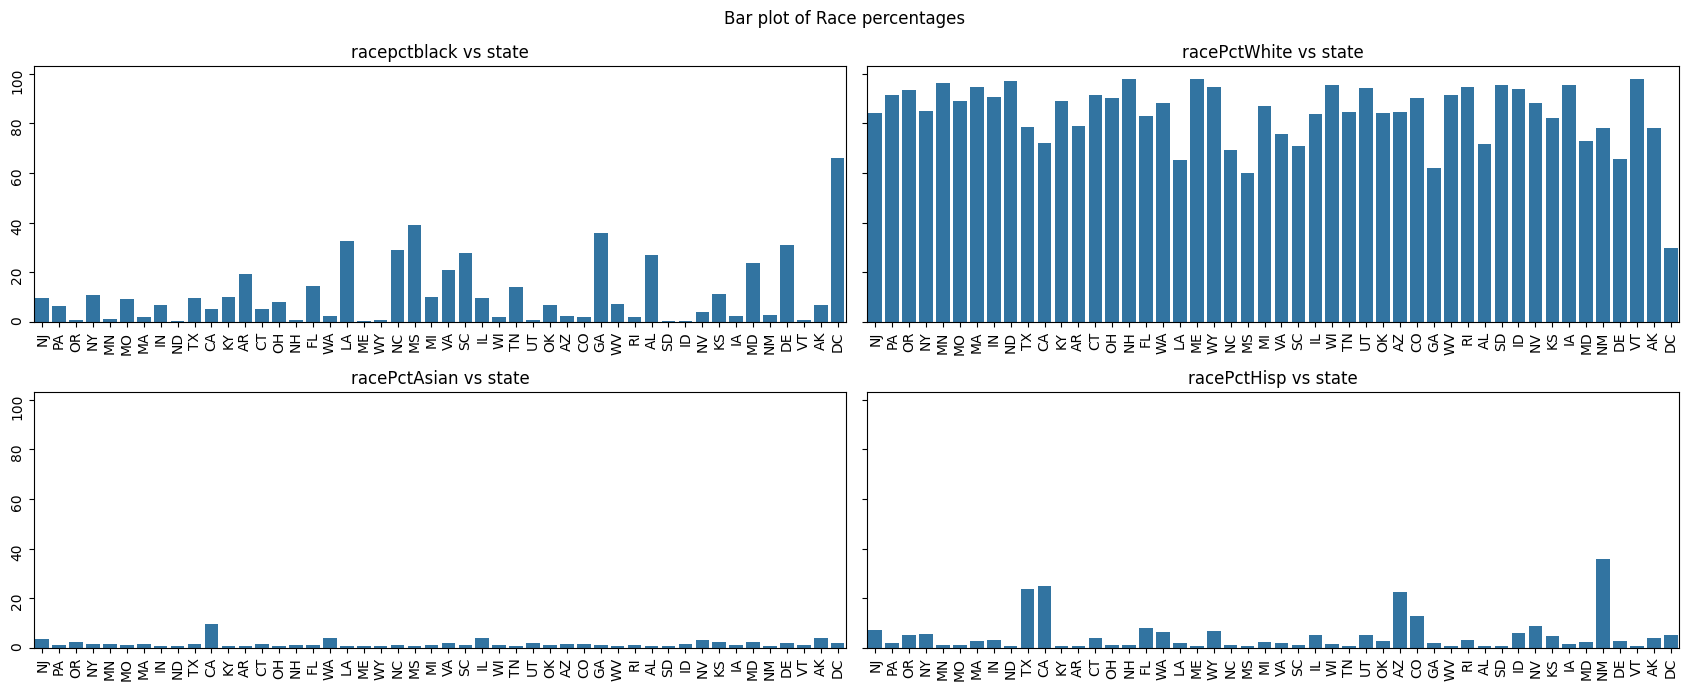

In [280]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["racepctblack", "racePctWhite" , "racePctAsian", "racePctHisp"], 
    title="Bar plot of Race percentages", 
    n_rows=2, n_cols=2, 
    figsize=(17, 7), 
    xtick_rotation=90,
    sharex=False, 
    )

- Most of the race in every state is white, the second highest is black.

In [289]:
all_sum = crime_df[["racepctblack", "racePctWhite", "racePctAsian", "racePctHisp"]].sum().sum()
black_proportion = crime_df["racepctblack"].sum()/all_sum
white_proportion = crime_df["racePctWhite"].sum()/all_sum
hispanic_proportion = crime_df["racePctHisp"].sum()/all_sum
asian_proportion = crime_df["racePctAsian"].sum()/all_sum
print(f"Black proportion: {black_proportion*100}")
print(f"White proportion: {white_proportion*100}")
print(f"Hispanic proportion: {hispanic_proportion*100}")
print(f"Asian proportion: {asian_proportion*100}")

Black proportion: 8.981646812835335
White proportion: 80.80009316440089
Hispanic proportion: 7.649158712168087
Asian proportion: 2.5691013105956824


In [260]:
crime_df.columns

Index(['Êcommunityname', 'state', 'countyCode', 'communityCode', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop'], dtype='object', length=125)

C:\Users\riain\AppData\Local\Temp\ipykernel_18600\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


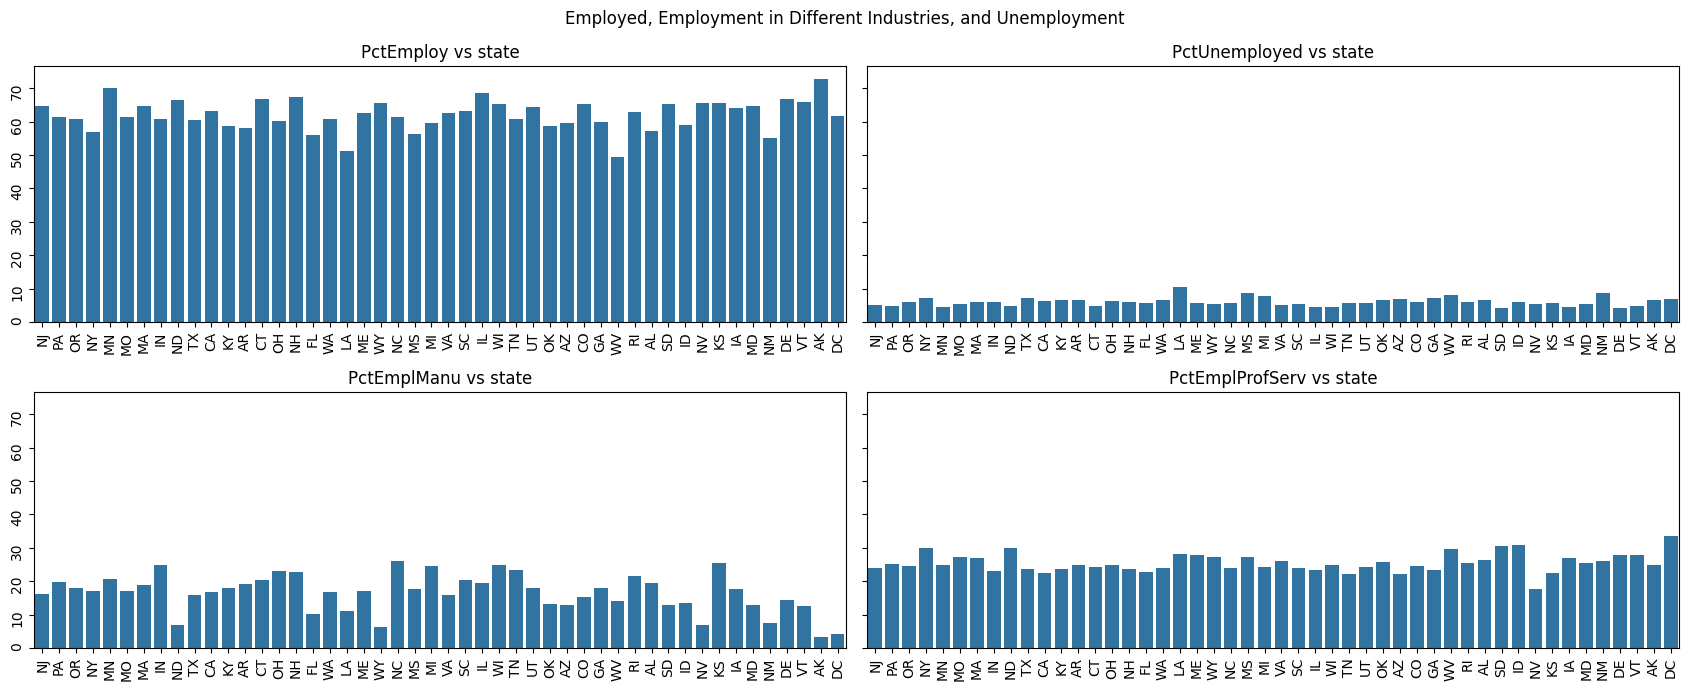

In [233]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["PctEmploy", "PctUnemployed", "PctEmplManu", "PctEmplProfServ"], 
    title="Employed, Employment in Different Industries, and Unemployment", 
    n_rows=2, n_cols=2, 
    figsize=(17, 7), 
    xtick_rotation=90,
    sharex=False, 
    )

* PctUnemployed: Percentage of unemployed individuals (numeric)
* PctEmploy: Percentage of employed individuals (numeric)
* PctEmplManu: Percentage of people employed in manufacturing (numeric)
* PctEmplProfServ: Percentage of people employed in professional services (numeric)

C:\Users\riain\AppData\Local\Temp\ipykernel_18600\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


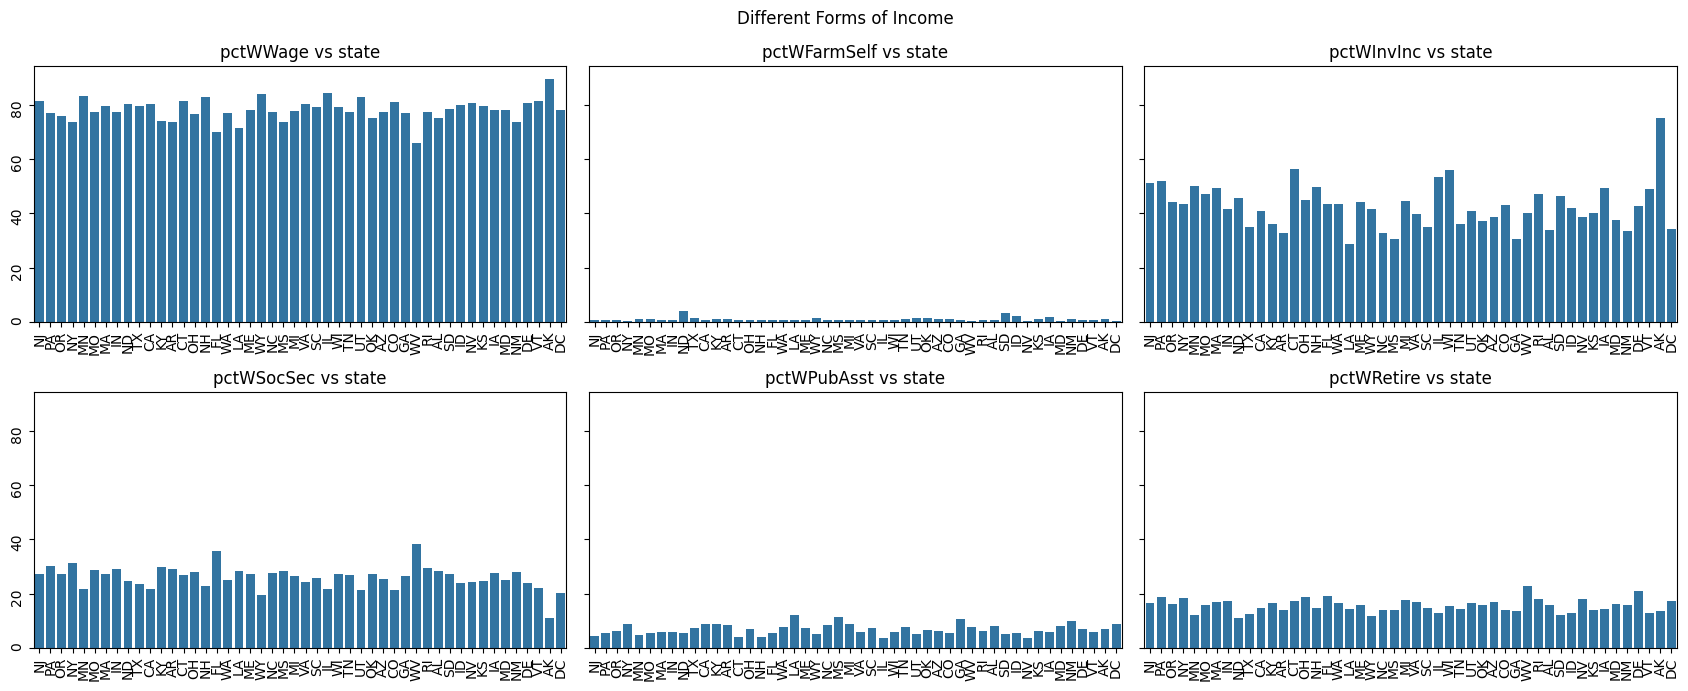

In [241]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire"], 
    title="Different Forms of Income", 
    n_rows=2, n_cols=3, 
    figsize=(17, 7), 
    xtick_rotation=90,
    sharex=False, 
    )

* pctWWage: Percentage of households with wage/salary income in 1989 (numeric)
* pctWFarmSelf: Percentage of households with farm or self-employment income in 1989 (numeric)
* pctWInvInc: Percentage of households with investment income (numeric)
* pctWSocSec: Percentage of households with social security income (numeric)
* pctWPubAsst: Percentage of households with public assistance (numeric)
* pctWRetire: Percentage of households with retirement income (numeric)

C:\Users\riain\AppData\Local\Temp\ipykernel_18600\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


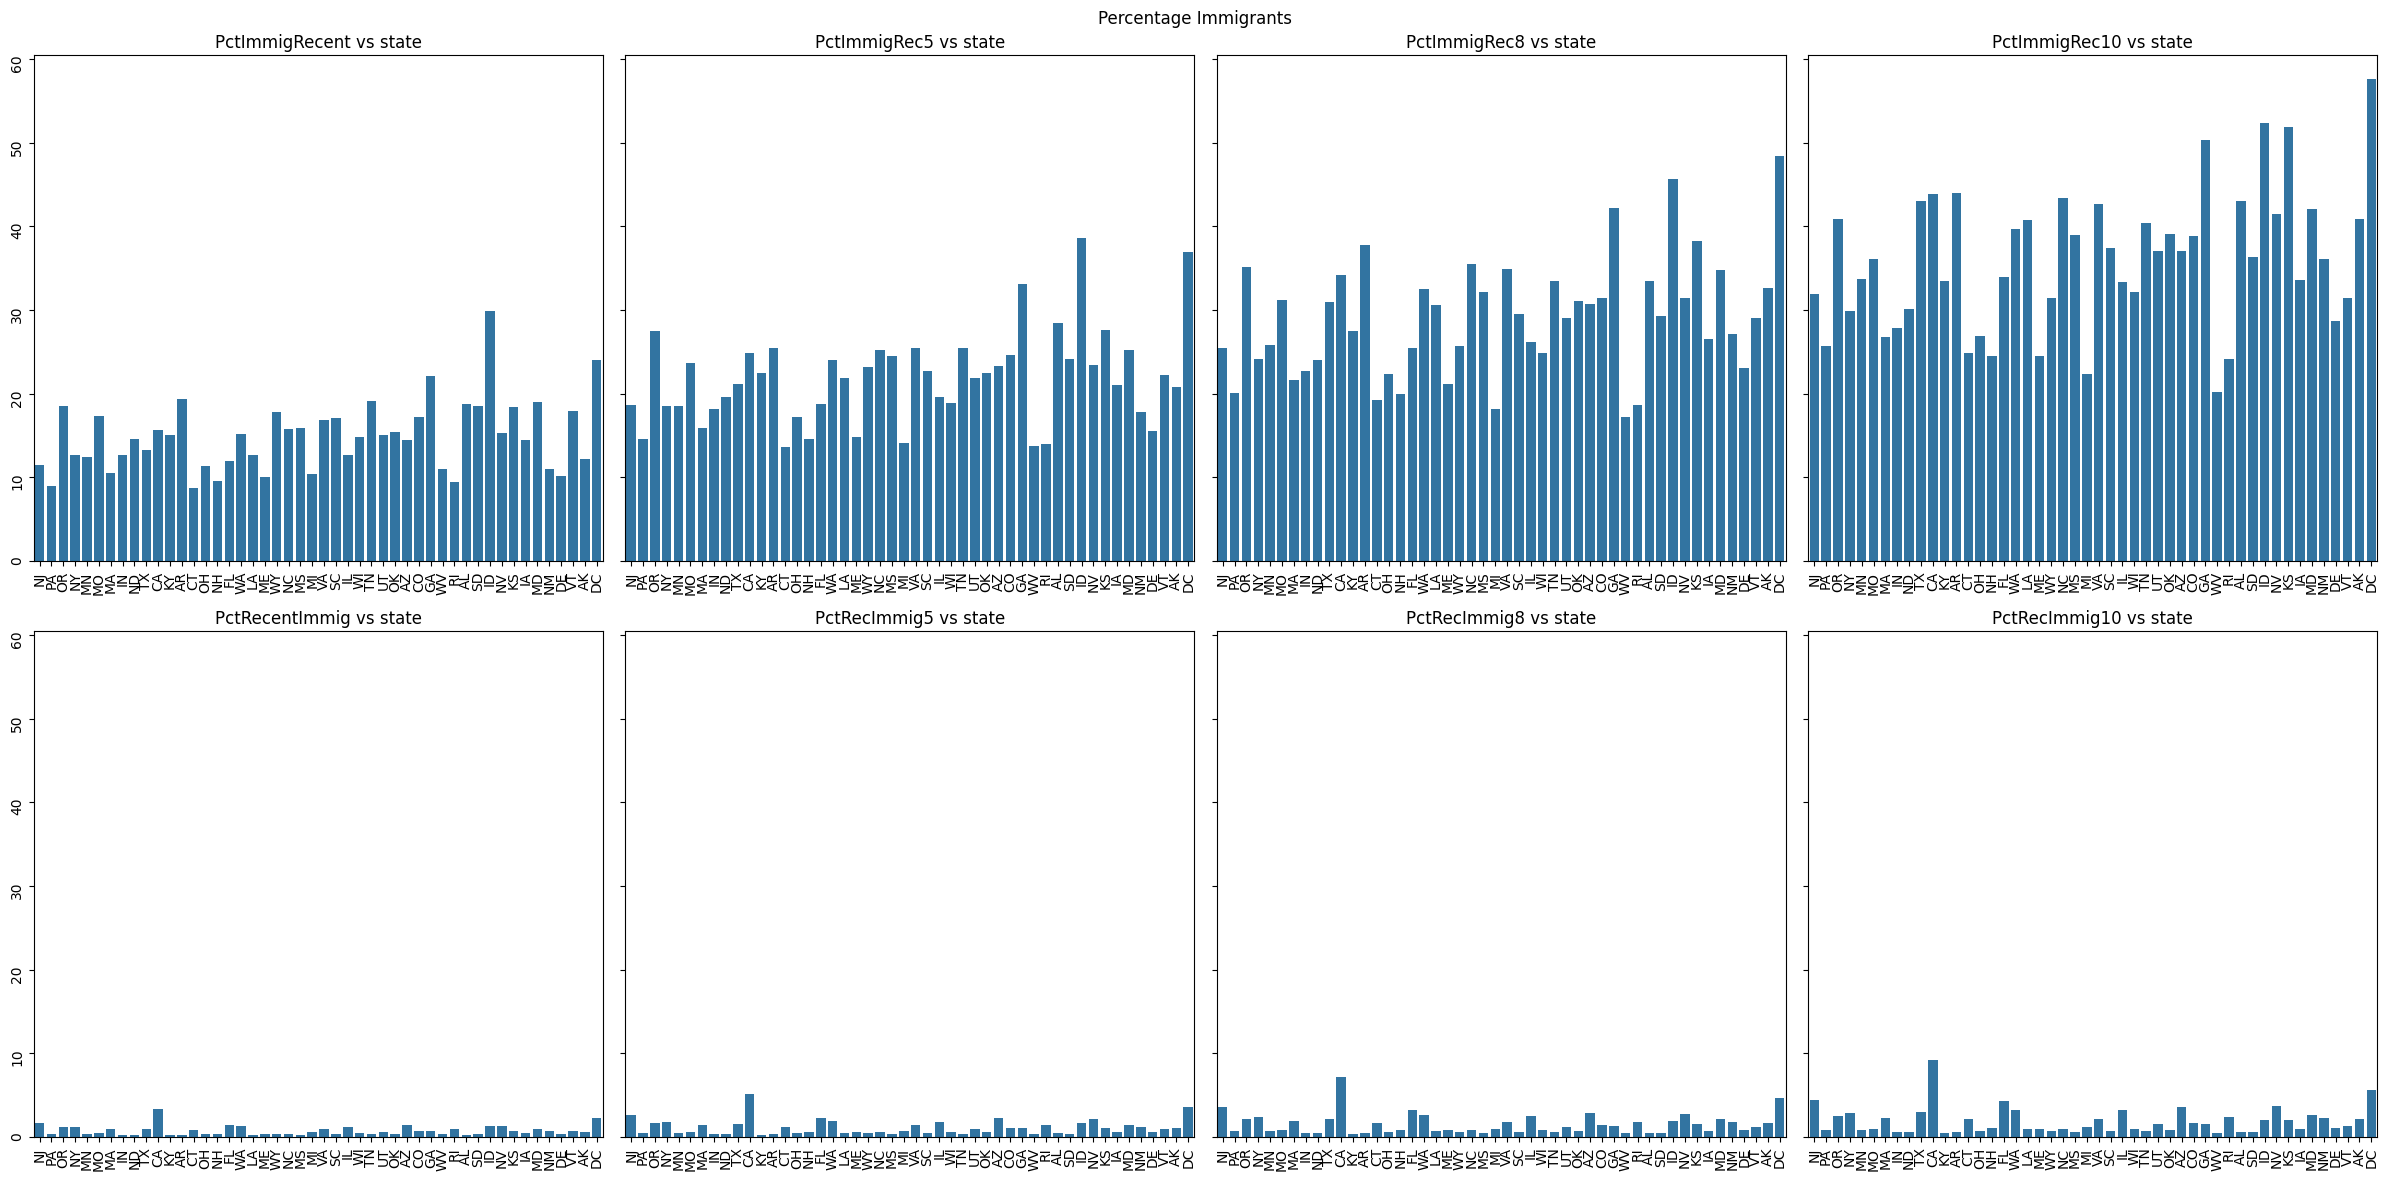

In [247]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10"], 
    title="Percentage Immigrants", 
    n_rows=2, n_cols=4, 
    figsize=(24, 12), 
    xtick_rotation=90,
    sharex=False, 
    )

* PctImmigRecent: Percentage of recent immigrants (within 3 years) (numeric)
* PctImmigRec5: Percentage of immigrants within the last 5 years (numeric)
* PctImmigRec8: Percentage of immigrants within the last 8 years (numeric)
* PctImmigRec10: Percentage of immigrants within the last 10 years (numeric)
* PctRecentImmig: Percentage of recent immigrants in the population (numeric)
* PctRecImmig5: Percentage of population who immigrated within the last 5 years (numeric)
* PctRecImmig8: Percentage of population who immigrated within the last 8 years (numeric)
* PctRecImmig10: Percentage of population who immigrated within the last 10 years (numeric)

C:\Users\riain\AppData\Local\Temp\ipykernel_18600\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


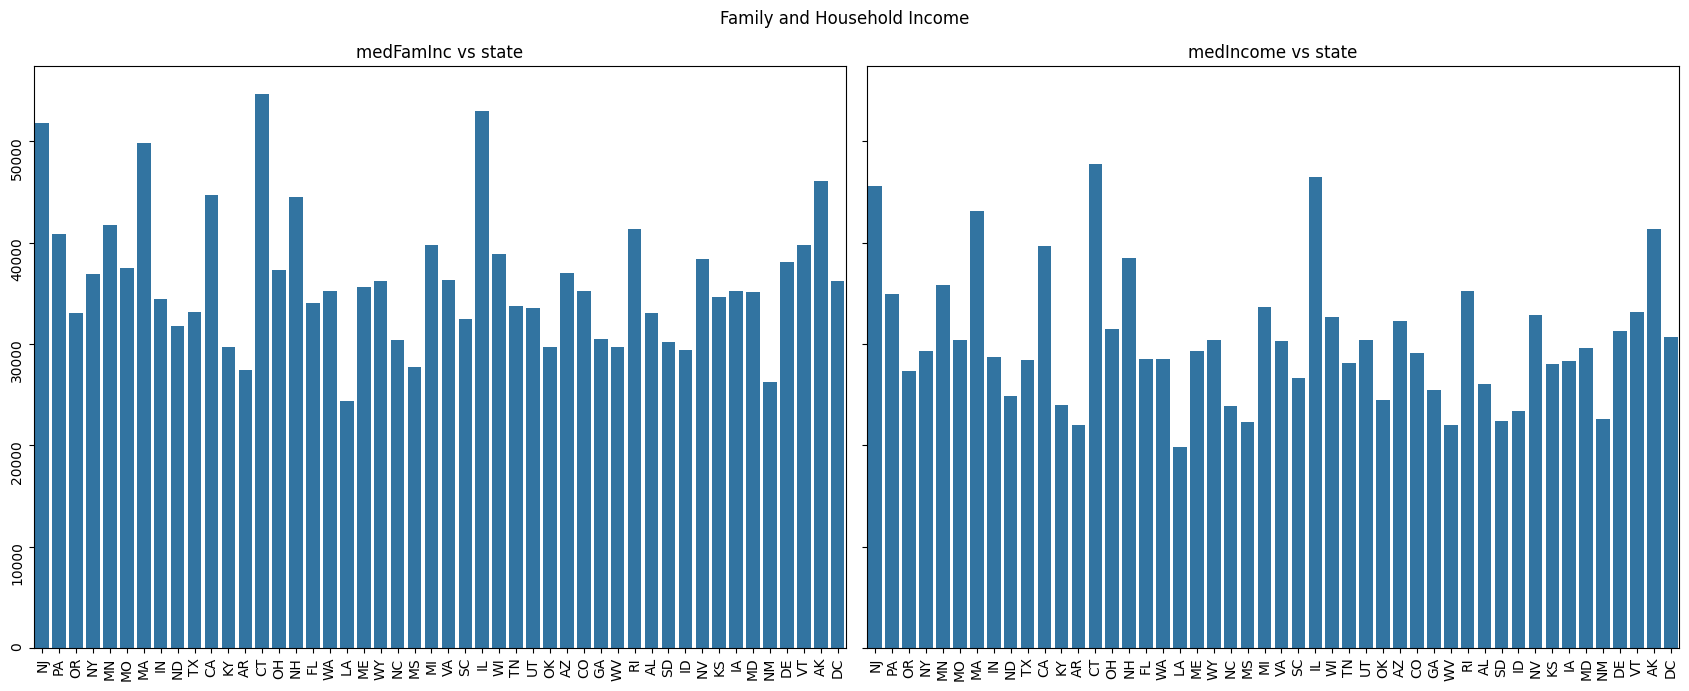

In [245]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["medFamInc", "medIncome"], 
    title="Family and Household Income", 
    n_rows=1, n_cols=2, 
    figsize=(17, 7), 
    xtick_rotation=90,
    sharex=False, 
    )

* medIncome: Median household income (numeric)
* medFamInc: Median family income (numeric)

## Outliers
---

In [60]:
def outlierChecker(data: pd.DataFrame, column: str):
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    upper_outliers = data[data[column] > data[column].quantile(0.75) + 1.5 * iqr]
    lower_outliers = data[data[column] < data[column].quantile(0.25) - 1.5 * iqr]
    return upper_outliers, lower_outliers

def outlierSummary(data: pd.DataFrame, column: str):
    upper, lower = outlierChecker(data, column)
    print(f"Column: {column}")
    print(f"Upper Outliers: {len(upper)}")
    print(f"Lower Outliers: {len(lower)}")
    print(f"Normalized Upper Outliers: {len(upper)/data.shape[0]}")
    print(f"Normalized Lower Outliers: {len(lower)/data.shape[0]}")
    print("-----------------------------------")

def outlierSummary2(data: pd.DataFrame, column: str):
    upper, lower = outlierChecker(data, column)
    print(f"Column: {column} has {len(upper)+len(lower)} outliers")

In [61]:
for col in crime_df.select_dtypes(include=["number"]).columns.tolist():
    outlierSummary2(data=crime_df, column=col)

Column: fold has 0 outliers
Column: population has 219 outliers
Column: householdsize has 93 outliers
Column: racepctblack has 252 outliers
Column: racePctWhite has 88 outliers
Column: racePctAsian has 240 outliers
Column: racePctHisp has 268 outliers
Column: agePct12t21 has 153 outliers
Column: agePct12t29 has 151 outliers
Column: agePct16t24 has 206 outliers
Column: agePct65up has 38 outliers
Column: numbUrban has 165 outliers
Column: pctUrban has 0 outliers
Column: medIncome has 43 outliers
Column: pctWWage has 25 outliers
Column: pctWFarmSelf has 117 outliers
Column: pctWInvInc has 2 outliers
Column: pctWSocSec has 19 outliers
Column: pctWPubAsst has 76 outliers
Column: pctWRetire has 34 outliers
Column: medFamInc has 63 outliers
Column: perCapInc has 111 outliers
Column: whitePerCap has 119 outliers
Column: blackPerCap has 72 outliers
Column: indianPerCap has 133 outliers
Column: AsianPerCap has 116 outliers
Column: HispPerCap has 85 outliers
Column: NumUnderPov has 235 outliers
C

4. If we calculate the outliers with IQR method, then we see outliers in almost every column to take note of.

## Correlation
---

In [74]:
# Dropping columns that we don't want to make numeric and creating a new df
columns_to_drop = ['Êcommunityname', 'state', 'countyCode', 'communityCode']
numeric_crime_df = crime_df.drop(columns=columns_to_drop)
numeric_crime_df = numeric_crime_df.apply(pd.to_numeric, errors='coerce')

In [86]:
# Creating a correlation matrix and save the correlation matrix to a CSV to check all columns
correlation_matrix = numeric_crime_df.corr()
correlation_matrix.to_csv('../data/correlation_matrix.csv', encoding='utf-8', index=False)

In [87]:
# Threshold so that we only get the results for features we would want to use
threshold = 0.7

high_correlation = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

In [92]:
# We are focused on autoTheft so we are going to only grab the columns of interest
interest_columns = ['autoTheft', 'autoTheftPerPop']
interest_correlation = correlation_matrix[interest_columns].sort_values(by='autoTheft', ascending=False)

# print(interest_correlation)

In [91]:
# # Plot a heatmap of the autoTheft correlation matrix
# plt.figure(figsize=(20, 18))
# sns.heatmap(interest_correlation, cmap='coolwarm', annot=False, vmin=-1, vmax=1)

In [15]:
# Correlation of each feature with 'autoTheft'
target_corr = correlation_matrix['autoTheft'].sort_values(ascending=False)
print(target_corr)

autoTheft        1.000000
NumUnderPov      0.983919
population       0.980754
numbUrban        0.979503
robberies        0.971612
                   ...   
PctTeen2Par     -0.167564
PctFam2Par      -0.172405
PctPolicWhite   -0.175015
PctKids2Par     -0.177880
racePctWhite    -0.206655
Name: autoTheft, Length: 143, dtype: float64


In [90]:
# Find correlations for 'autoTheft' and 'autoTheftPerPop'
autoTheft_corr = correlation_matrix['autoTheft'].drop('autoTheft')  # Drop self-correlation
autoTheftPerPop_corr = correlation_matrix['autoTheftPerPop'].drop('autoTheftPerPop')  # Drop self-correlation

# Sort and take the top 6
top_autoTheft_corr = autoTheft_corr.abs().sort_values(ascending=False).head(6)
top_autoTheftPerPop_corr = autoTheftPerPop_corr.abs().sort_values(ascending=False).head(6)

# Create a df using the results
top_correlations = pd.DataFrame({
    'autoTheft': top_autoTheft_corr,
    'autoTheftPerPop': top_autoTheftPerPop_corr
})

# Display the result
# print(top_correlations)

In [20]:
# Transpose the df
transposed_df = top_correlations.T

transposed_df.columns

Index(['NumUnderPov', 'ViolentCrimesPerPop', 'burglPerPop', 'burglaries', 'murdPerPop', 'murders', 'nonViolPerPop', 'numbUrban', 'population', 'racePctWhite', 'robbbPerPop', 'robberies'], dtype='object')

In [21]:
# # Create a df with the original data but only with the columns of interest
# featured_data = crime_df[['Êcommunityname', 'state', 'countyCode', 
#                           'communityCode','NumUnderPov', 'ViolentCrimesPerPop',
#                           'burglPerPop', 'burglaries', 'murdPerPop', 'murders', 
#                           'nonViolPerPop', 'numbUrban', 'population', 'racePctWhite', 
#                           'robbbPerPop', 'robberies', 'autoTheft','autoTheftPerPop']]

- Only categorical columns are geographic locations, so we can use them but I don't think it will help that much when creating a model.
- There are a lot of numerical columns (some are shown as Object types). We might do binning depending on the distribution of a feature, if there is highly skewed variables, or for categorical representation like age range or area. 

In [95]:
print("Our target variables will be autoTheft and autoTheftPerPop")
print("Our predictor variables will be the different races per capita, race pecentages, median income, maybe murders since it has a moderately positive correlation \nwith auto theft, age, unemployed, employed, number in shelters, etc.")
print("Note: We might remove some features or replace them if we have different or new hyptheses, but we will definitely use race, median income, unemployed as demographic features. \nCrime features that we might use are larcenies, burglaries, and robberies. \nThese crime features might be more useful as predictor variables but our goal to see the probablity of a auto theft happening depending on the value of these crime features.")
print("We can use some stereo types as our hypothesis and see what the outcome is to see if our hypothesis/stereotypes are actually true.")

Our target variables will be autoTheft and autoTheftPerPop
Our predictor variables will be the different races per capita, race pecentages, median income, maybe murders since it has a moderately positive correlation 
with auto theft, age, unemployed, employed, number in shelters, etc.
Note: We might remove some features or replace them if we have different or new hyptheses, but we will definitely use race, median income, unemployed as demographic features. 
Crime features that we might use are larcenies, burglaries, and robberies. 
These crime features might be more useful as predictor variables but our goal to see the probablity of a auto theft happening depending on the value of these crime features.
We can use some stereo types as our hypothesis and see what the outcome is to see if our hypothesis/stereotypes are actually true.
